In [1]:
import numpy as np
atm_press_Pa = 101325.0
unit_weight_water_N_per_m3 = 9810.0
field_capacity_atm_press_fraction = 0.18
soil_params = {}
soil_params["smcmax"] = 0.4
soil_params["satpsi"] = 0.141
soil_params["bb"] = 3
soil_params["D"] = 3
trigger_z_m_fraction = 0.25

In [2]:
trigger_z_m = soil_params["D"] * trigger_z_m_fraction

H_water_table_m = (
    field_capacity_atm_press_fraction
    * atm_press_Pa
    / unit_weight_water_N_per_m3
)  # Lateral flow function 1&2, Equation 3 (Ogden's document)

soil_water_content_at_field_capacity = soil_params["smcmax"] * np.power(
    H_water_table_m / soil_params["satpsi"], (1.0 / soil_params["bb"])
)  # Lateral flow function 1&2, Equation 3 (Ogden's document), but this equaton is not used in later process

Omega = (
    H_water_table_m - trigger_z_m
)  # Lateral flow function 3 (Ogden's document). Soil water storage in the soil column, when the lowest soil discretization is equal to field capacity.

if Omega < 0:
    integral_lower_lim_m = 0
    integral_upper_lim_m = (
        soil_params["D"] - trigger_z_m + H_water_table_m
    )
    additional_term = trigger_z_m - H_water_table_m
else:
    integral_lower_lim_m = Omega
    integral_upper_lim_m = Omega + soil_params["D"]
    additional_term = 0

lower_lim = np.power(
    integral_lower_lim_m, (1.0 - 1.0 / soil_params["bb"])
) / (
    1.0 - 1.0 / soil_params["bb"]
)  # Lower limit of the integral in equation 4 (Ogden's document).

upper_lim = np.power(
    integral_upper_lim_m, (1.0 - 1.0 / soil_params["bb"])
) / (
    1.0 - 1.0 / soil_params["bb"]
)  # Upper limit of the integral in equation 4 (Ogden's document).

storage_thresh_pow_term = np.power(
    1.0 / soil_params["satpsi"], (-1.0 / soil_params["bb"])
)  # This seems to be redundant? Or for needed for descritization?

lim_diff = (
    upper_lim - lower_lim
)  # Integral term of the equation 4 (Ogden's document).

field_capacity_storage_threshold_m = (
    soil_params["smcmax"] * storage_thresh_pow_term * lim_diff
) + soil_params[
    "smcmax"
] * additional_term  # Equation 4 (and probably 5?) (Ogden's document).

print(f"Storage: {soil_params['D']*soil_params['smcmax']}")
print(f"Threshold: {field_capacity_storage_threshold_m}")

Storage: 1.2000000000000002
Threshold: 0.4665505818947366


In [3]:
input_file = rf"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\LittleWashita\little_washita_2006_2012.csv"
import pandas as pd
LW = pd.read_csv(input_file)
LW.head()

,time,precip_rate,PET
0,2006-09-19 00:00:00,0.0,0.000161
1,2006-09-19 01:00:00,0.0,0.000161
2,2006-09-19 02:00:00,0.0,0.000161
3,2006-09-19 03:00:00,0.0,0.000161
4,2006-09-19 04:00:00,0.0,0.000161


(20000.0, 25000.0)

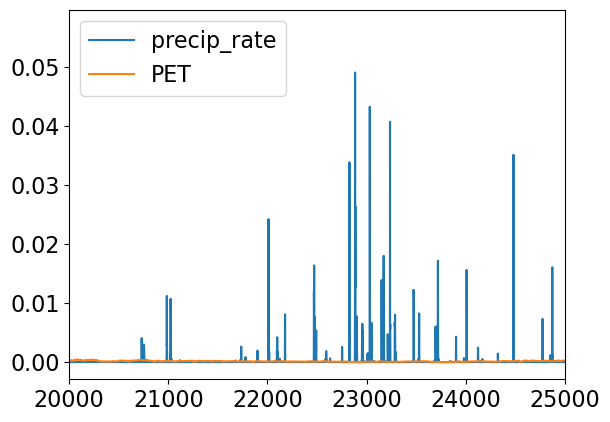

In [4]:
LWplt = LW.plot()
LWplt.set_xlim([20000, 25000])